In [1]:
import pandas as pd
import numpy as np


In [2]:
data_df = pd.read_csv('engament_sample.csv')
data_df.head(3)

,user_id,gender,age,location,likes,comments,shares,clicks,views,time_spent,device,referral_source,followers,top_comment
0,1,Female,25-34,NaN,100,20,10,50,500,30,Mobile,Instagram,1000,Awesome stuff!
1,2,Male,35-44,Los @angeles,200,30,15,100,1000,45,Desktop,Google,2000,Interesting post! I enjoyed reading it.
2,3,Female,18-24,Chicago,50,10,5,20,200,20,Mobile,Facebook,500,Very informative.


### Data Cleaning

In [130]:
#for missing in Gender input with 'Female'
data_df['gender'].fillna('female',inplace=True)

In [131]:
#for missing in location fill with mode
data_df['location'].fillna(data_df.location.mode()[0],inplace=True)

In [132]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          18 non-null     int64 
 1   gender           18 non-null     object
 2   age              18 non-null     object
 3   location         18 non-null     object
 4   likes            18 non-null     int64 
 5   comments         18 non-null     int64 
 6   shares           18 non-null     int64 
 7   clicks           18 non-null     int64 
 8   views            18 non-null     int64 
 9   time_spent       18 non-null     int64 
 10  device           18 non-null     object
 11  referral_source  18 non-null     object
 12  followers        18 non-null     int64 
 13  top_comment      18 non-null     object
dtypes: int64(8), object(6)
memory usage: 2.1+ KB


In [133]:
#Drop duplicates
data_df.drop_duplicates(inplace=True)

In [134]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          18 non-null     int64 
 1   gender           18 non-null     object
 2   age              18 non-null     object
 3   location         18 non-null     object
 4   likes            18 non-null     int64 
 5   comments         18 non-null     int64 
 6   shares           18 non-null     int64 
 7   clicks           18 non-null     int64 
 8   views            18 non-null     int64 
 9   time_spent       18 non-null     int64 
 10  device           18 non-null     object
 11  referral_source  18 non-null     object
 12  followers        18 non-null     int64 
 13  top_comment      18 non-null     object
dtypes: int64(8), object(6)
memory usage: 2.1+ KB


In [135]:
#Check for special characters
import re
#Define a function to check for special characters in a string
def has_special_characters(text):
    pattern = r'[!@#$%^&*(),.?":{}|<>]'
    return bool(re.search(pattern, str(text)))  # Convert to string

#Apply the function to each element in the DataFrame
contains_special_chars = data_df.applymap(has_special_characters)

#Filter the DataFrame to return rows containing special characters
rows_w_special_chars = data_df[contains_special_chars.any(axis=1)]
rows_w_special_chars

,user_id,gender,age,location,likes,comments,shares,clicks,views,time_spent,device,referral_source,followers,top_comment
0,1,Female,25-34,Minneapolis,100,20,10,50,500,30,Mobile,Instagram,1000,Awesome stuff!
1,2,Male,35-44,Los @angeles,200,30,15,100,1000,45,Desktop,Google,2000,Interesting post! I enjoyed reading it.
2,3,Female,18-24,Chicago,50,10,5,20,200,20,Mobile,Facebook,500,Very informative.
3,4,Male,45-54,San,150,25,12,80,800,40,Desktop,Direct,1500,This is terrible.
4,5,female,25-34,Houston,80,15,8,40,400,25,Mobile,Twitter,800,Really bad!
5,6,Male,35-44,Boston,120,20,10,60,600,35,Desktop,Google,1200,Very informative.
6,7,female,18-24,Miami,70,12,6,30,300,22,Mobile,Instagram,700,Interesting post! I enjoyed reading it.
7,8,Male,45-54,Minneapolis,180,28,14,90,900,42,Desktop,Facebook,1800,Love this!
8,9,Female,25-34,d@llas,90,18,9,45,450,28,Mobile,Direct,900,This is terrible.
9,10,Male,35-44,Philadelphia,130,22,11,70,700,38,Desktop,Twitter,1300,This is bad.


In [136]:
#Correct Data Inconsistency - Impute with special characters:
data_df.location = data_df.location.replace('Los @angeles', 'Los Angeles')
data_df.location = data_df.location.replace('d@llas','Dallas')

data_df

,user_id,gender,age,location,likes,comments,shares,clicks,views,time_spent,device,referral_source,followers,top_comment
0,1,Female,25-34,Minneapolis,100,20,10,50,500,30,Mobile,Instagram,1000,Awesome stuff!
1,2,Male,35-44,Los Angeles,200,30,15,100,1000,45,Desktop,Google,2000,Interesting post! I enjoyed reading it.
2,3,Female,18-24,Chicago,50,10,5,20,200,20,Mobile,Facebook,500,Very informative.
3,4,Male,45-54,San,150,25,12,80,800,40,Desktop,Direct,1500,This is terrible.
4,5,female,25-34,Houston,80,15,8,40,400,25,Mobile,Twitter,800,Really bad!
5,6,Male,35-44,Boston,120,20,10,60,600,35,Desktop,Google,1200,Very informative.
6,7,female,18-24,Miami,70,12,6,30,300,22,Mobile,Instagram,700,Interesting post! I enjoyed reading it.
7,8,Male,45-54,Minneapolis,180,28,14,90,900,42,Desktop,Facebook,1800,Love this!
8,9,Female,25-34,Dallas,90,18,9,45,450,28,Mobile,Direct,900,This is terrible.
9,10,Male,35-44,Philadelphia,130,22,11,70,700,38,Desktop,Twitter,1300,This is bad.


In [137]:
#Correct Data Inconsistency - convert text/categorical variables to lowecase
cols_to_lower = ['gender','location','device','referral_source','top_comment']
data_df[cols_to_lower] = data_df[cols_to_lower].applymap(lambda x : x.lower())
data_df.head(3)

,user_id,gender,age,location,likes,comments,shares,clicks,views,time_spent,device,referral_source,followers,top_comment
0,1,female,25-34,minneapolis,100,20,10,50,500,30,mobile,instagram,1000,awesome stuff!
1,2,male,35-44,los angeles,200,30,15,100,1000,45,desktop,google,2000,interesting post! i enjoyed reading it.
2,3,female,18-24,chicago,50,10,5,20,200,20,mobile,facebook,500,very informative.


In [138]:
#Feature Engineering: Calculate engagement_rate - likes/followers
data_df['engament_rate'] = data_df.likes/data_df.followers
data_df.head(3)


,user_id,gender,age,location,likes,comments,shares,clicks,views,time_spent,device,referral_source,followers,top_comment,engament_rate
0,1,female,25-34,minneapolis,100,20,10,50,500,30,mobile,instagram,1000,awesome stuff!,0.1
1,2,male,35-44,los angeles,200,30,15,100,1000,45,desktop,google,2000,interesting post! i enjoyed reading it.,0.1
2,3,female,18-24,chicago,50,10,5,20,200,20,mobile,facebook,500,very informative.,0.1


### Data Exploration

In [139]:
#Descriptive Stats:
data_df.describe()

,user_id,likes,comments,shares,clicks,views,time_spent,followers,engament_rate
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,9.277778,121.111111,20.222222,10.222222,60.277778,602.777778,33.222222,1211.111111,1.000000e-01
std,5.015336,49.543669,6.795808,3.299832,26.594572,265.945717,8.363475,495.436693,2.856025e-17
min,1.000000,50.000000,10.000000,5.000000,20.000000,200.000000,20.000000,500.000000,1.000000e-01
25%,5.250000,76.250000,13.500000,7.250000,36.250000,362.500000,26.000000,762.500000,1.000000e-01
50%,9.500000,115.000000,20.000000,10.000000,57.500000,575.000000,33.500000,1150.000000,1.000000e-01
75%,13.750000,165.000000,26.500000,12.750000,83.750000,837.500000,40.750000,1650.000000,1.000000e-01
max,16.000000,200.000000,30.000000,15.000000,100.000000,1000.000000,45.000000,2000.000000,1.000000e-01


In [140]:
#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

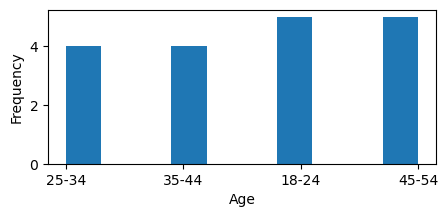

In [141]:
plt.figure(figsize=(5,2))
plt.hist(data_df.age)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

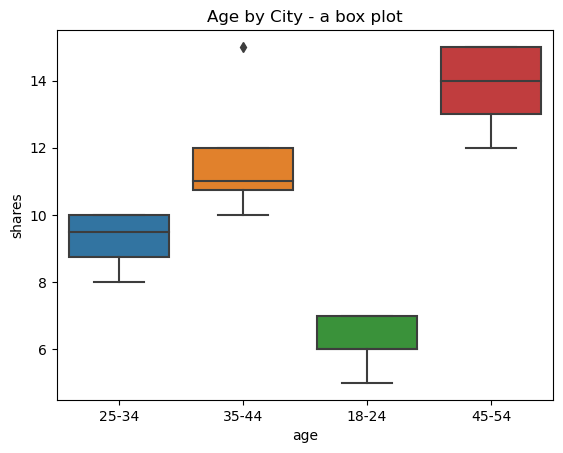

In [142]:
sns.boxplot(data=data_df, x='age', y='shares')
plt.title('Age by City - a box plot')
plt.show()

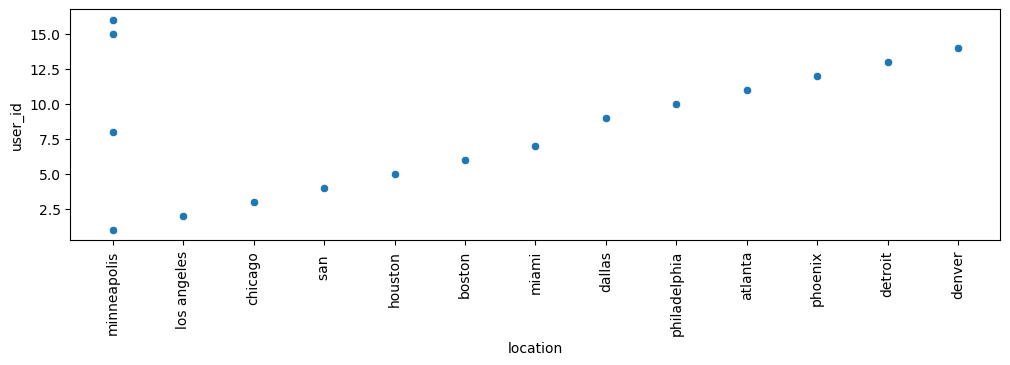

In [143]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=data_df , x='location',y='user_id') #scatterplot
plt.xticks(rotation=90)
plt.show()

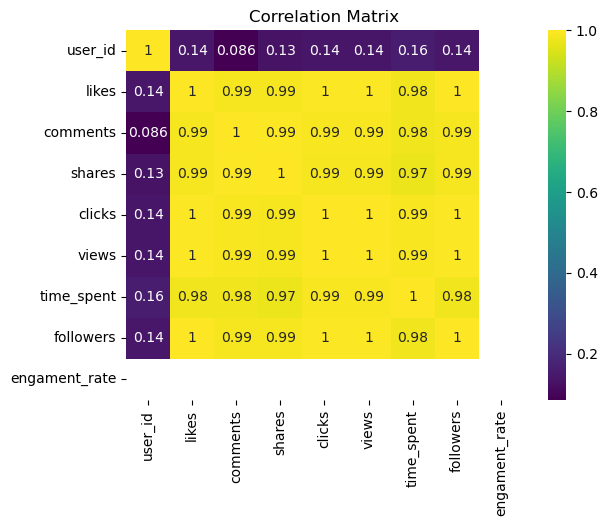

In [144]:
#Correlation Analysis-
#Calculate correlation coefficients to measure the strength and direction of relationships between NUMERICAL variables
correlation_matrix = data_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

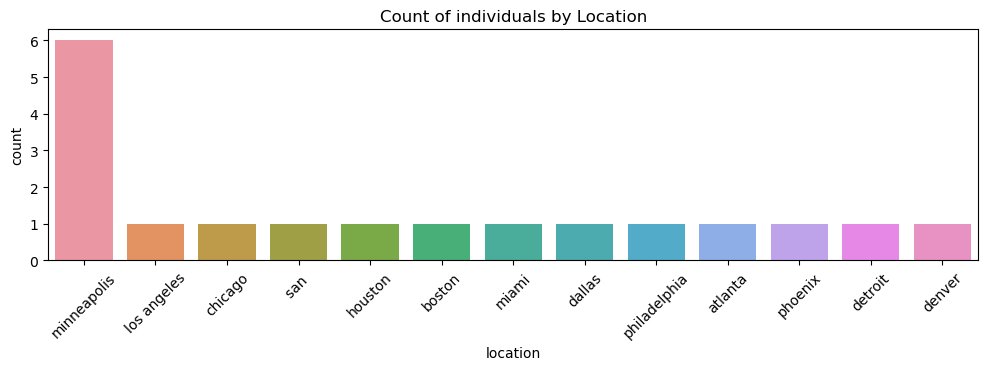

In [145]:
#Feature Distribution:
#Explore the distribution of categorical features
plt.figure(figsize=(12,3))
sns.countplot(data=data_df, x='location')
plt.title('Count of individuals by Location')
plt.xticks(rotation=45)
plt.show()

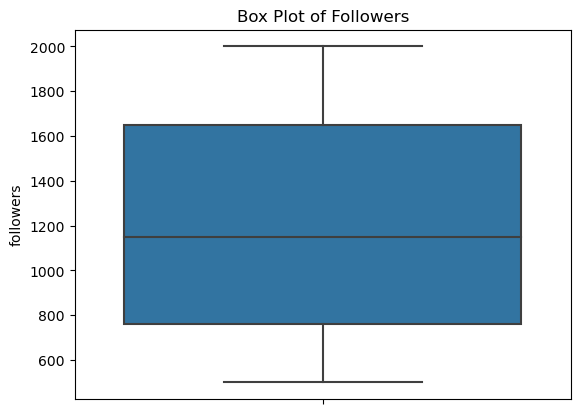

In [146]:
#Outlier Detection:
#Identify outliers in numerical variables
sns.boxplot(y=data_df['followers'])
plt.title('Box Plot of Followers')
plt.show()

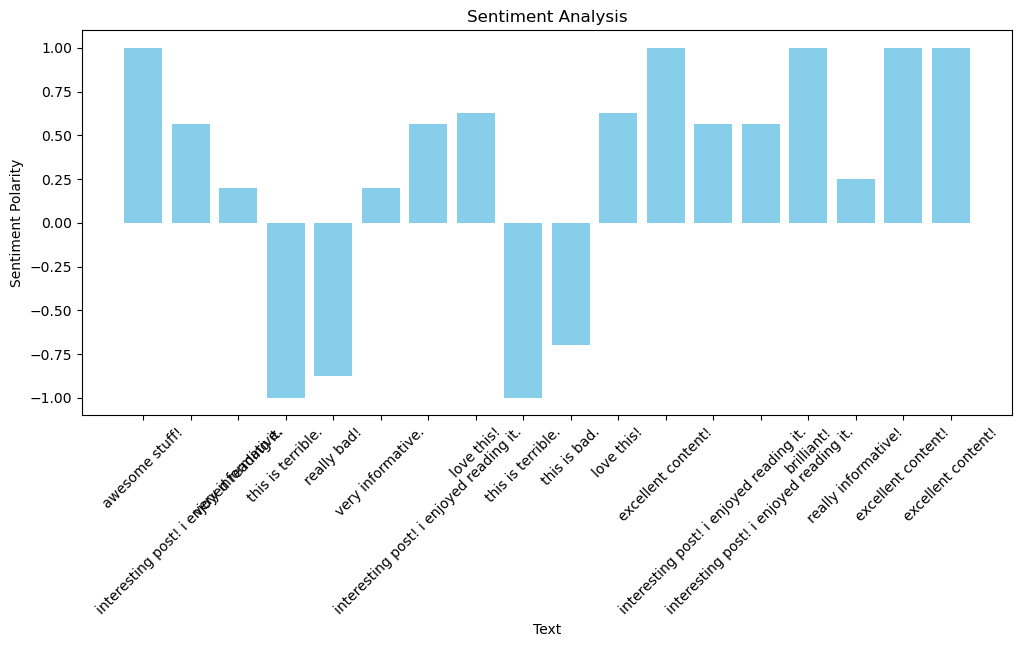

In [147]:
# Text Analysis:
# If you have text data, perform text mining techniques such as sentiment analysis, topic 
# modeling (e.g., Latent Dirichlet Allocation), or named entity recognition.


from textblob import TextBlob

# Sample text data
text_data = data_df.top_comment

# Perform sentiment analysis
sentiments = [TextBlob(text).sentiment.polarity for text in text_data]

# Visualize sentiments
plt.figure(figsize=(12,5))
plt.bar(range(len(text_data)), sentiments, color='skyblue')
plt.xticks(range(len(text_data)), text_data, rotation=45)
plt.xlabel('Text')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis')
plt.show()

## Additional Analysis that can be done:

our data set at the moment can't cater to it but this are with sample data

In [150]:
import warnings
warnings.filterwarnings("ignore")

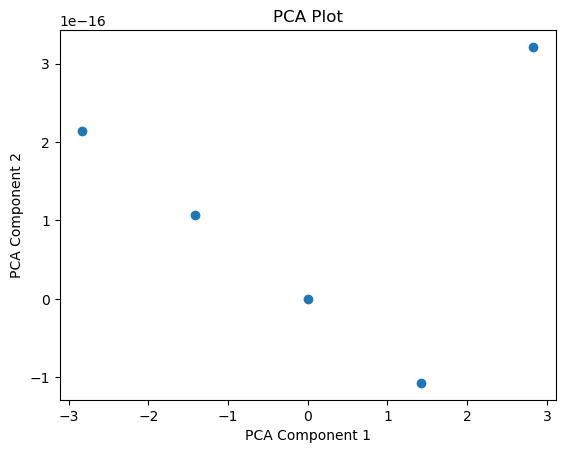

In [151]:
# Dimensionality Reduction Techniques:

# Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) 
# can help visualize high-dimensional data in lower dimensions.
# These techniques can be useful for understanding patterns and clusters in the data.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample DataFrame
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
})

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Plot PCA components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot')
plt.show()

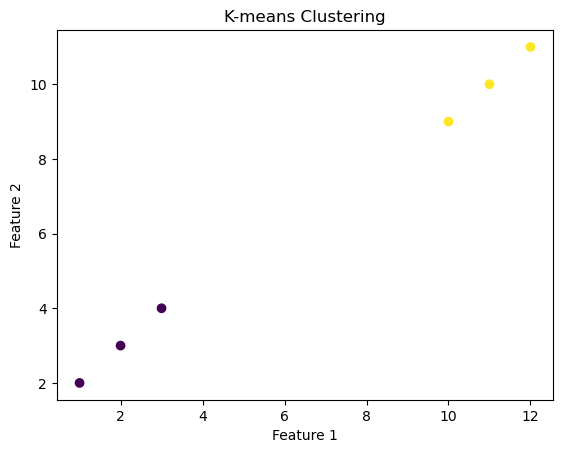

In [152]:
# Clustering Analysis:

# Apply clustering algorithms like K-means, hierarchical clustering, or DBSCAN to identify natural 
# groupings or clusters within the data.
# Visualize the clusters using scatter plots or heatmaps to understand the structure of the data.

from sklearn.cluster import KMeans

# Sample DataFrame
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 10, 11, 12],
    'Feature2': [2, 3, 4, 9, 10, 11]
})

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
clusters = kmeans.predict(data)

# Plot clusters
plt.scatter(data['Feature1'], data['Feature2'], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [153]:
# Association Rule Mining:

# Use techniques like Apriori algorithm to discover associations and frequent patterns in transactional datasets.

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample DataFrame
data = pd.DataFrame({
    'Transaction_ID': [1, 2, 3, 4, 5],
    'Items': [['apple', 'banana', 'orange'],
              ['banana', 'grape'],
              ['apple', 'grape'],
              ['banana', 'orange'],
              ['apple', 'banana', 'grape']]
})

# Convert the 'Items' column to a list of strings
data['Items'] = data['Items'].apply(lambda x: ','.join(x))

# Convert the list of items into one-hot encoded format
one_hot_encoded = data['Items'].str.get_dummies(',')

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display association rules
print("Association Rules:")
print(rules)

Association Rules:
       antecedents      consequents  antecedent support  consequent support  \
0          (grape)          (apple)                 0.6                 0.6   
1          (apple)          (grape)                 0.6                 0.6   
2         (orange)         (banana)                 0.4                 0.8   
3         (banana)         (orange)                 0.8                 0.4   
4  (orange, apple)         (banana)                 0.2                 0.8   
5  (banana, apple)         (orange)                 0.4                 0.4   
6         (orange)  (banana, apple)                 0.4                 0.4   
7         (banana)  (orange, apple)                 0.8                 0.2   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.4    0.666667  1.111111      0.04    1.200000       0.250000  
1      0.4    0.666667  1.111111      0.04    1.200000       0.250000  
2      0.4    1.000000  1.250000      0.08         in

In [88]:
# Geospatial Analysis (Folium):

# If your data contains spatial information, use geospatial analysis techniques to visualize data on maps, 
#analyze spatial patterns, and perform spatial clustering.
# Libraries like GeoPandas and Folium can be helpful for geospatial visualization and analysis.

import folium

# Sample data with latitude and longitude
data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'Latitude': [40.7128, 34.0522, 41.8781],
    'Longitude': [-74.0060, -118.2437, -87.6298]
})

# Create map
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=4)

# Add markers for each city
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(map)

# Display map
map

In [154]:
# Feature Selection: -SelectKBest

# Feature selection involves identifying the most relevant features (columns) 
# from your dataset that contribute the most to the predictive modeling task.
# Remove irrelevant or redundant features to improve model performance and reduce overfitting.

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Sample DataFrame with missing values
data = pd.DataFrame({
    'Feature1': [1, 2, 3, None, 5],
    'Feature2': [0, 1, 2, 3, 4],
    'Feature3': ['A', 'B', 'C', 'A', 'B'],
    'Target': [0, 1, 0, 1, 0]
})

# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Preprocessing: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X.select_dtypes(include=['number']))

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_imputed, y)
selected_features = X.select_dtypes(include=['number']).columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['Feature1', 'Feature2'], dtype='object')


In [94]:
# Data Transformation: Scaling

# Data transformation involves preparing the data for modeling by applying various techniques to the features.
# Common data transformation techniques include encoding categorical variables, scaling numerical features, 
# handling missing values, and creating new features.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Sample DataFrame with missing values
data = pd.DataFrame({
    'Feature1': [1, 2, 3, None, 5],
    'Feature2': [0, 1, 2, 3, 4],
    'Feature3': ['A', 'B', 'C', 'A', 'B']
})

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include='object').columns

# Data Transformation: Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
data_numeric = imputer_numeric.fit_transform(data[numeric_cols])
data[numeric_cols] = data_numeric

# Data Transformation: Standardize numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Transformed Data:")
print(data)

Transformed Data:
   Feature1  Feature2 Feature3
0 -1.322876 -1.414214        A
1 -0.566947 -0.707107        B
2  0.188982  0.000000        C
3  0.000000  0.707107        A
4  1.700840  1.414214        B
